## <font color='magenta'>{</font>Tender Hack<font color='magenta'>}</font> Екатеринбург  
# <p style='text-align: center;'><font color='black'>СОЗДАЙТЕ РЕКОМЕНДАТЕЛЬНЫЙ СЕРВИС ДЛЯ ЗАКУПОК ТОВАРОВ</font></p> 

## <font color='#00b43f'>ЦЕЛЬ И ЗАДАЧИ:</font>

### В рамках хакатона участникам предстоит реализовать задачи:

- Проанализировать бизнес-процесс закупки товара заказчиком (как происходит выбор, какие блоки рекомендаций нужны, на каких страницах и где их можно отображать)  
- Выявить метрики эффективности этого процесса и их триггеры роста  
- Реализовать логику нахождения товаров, которые подходят к блоку "Вместе с этим покупают" в зависимости от сегмента и иных критериев с учетом исторических данных. Протестировать работу системы  
- Определить возможности по масштабированию решения и последующим его доработкам  
- Презентовать проект

In [2]:
# Возмём необходимые библиотеки
import pandas as pd 
import numpy as np 
import json 
Tender_Hack_Ekb = pd.read_excel('DataSet_EKB_200000.xlsx') 
# Посмотрим как выглядят данные:
Tender_Hack_Ekb.head() 

,Идентификатор СТЕ,Наименование СТЕ,Категория,Описание,Характеристики СТЕ,Регионы поставки,Кол-во заключенных контрактов,Поставщики,Страна происхождения,Другая продукция в контрактах,Просмотры,Идентификатор КПГЗ,Код КПГЗ,Модель,Цена
0,20528973,"Светодиодная лента 2835, ULTRA, 12 Вольт, 60 l...",Лампы светодиодные,NaN,"[{""Name"":""Цвет свечения"",""Id"":-506425117,""Valu...","[{""Name"":""Москва""}]",NaN,"[{""SupplierId"":2310783,""Name"":""ООО \""ЛЮМЕНВАТТ...",NaN,NaN,1,12106442.0,01.10.05.02.04,2835ULTRA,NaN
1,34860341,Светодиодный светильник Geniled ЛПО 1200?180?...,Настенно-потолочные светильники,NaN,"[{""Name"":""Вид климатического исполнения"",""Id"":...","[{""Name"":""Свердловская""},{""Name"":""Москва""}]",1.0,"[{""SupplierId"":1559525,""Name"":""Общество с огра...",РОССИЯ,NaN,41,12114082.0,01.10.05.03.01.05,ЛПО 1200?180?40 40Вт 5000К Опал,NaN
2,34172198,Елка пристенно-угловая Графская премиум 210 см...,Предметы внутреннего интерьера,NaN,"[{""Name"":""Цвет"",""Id"":340085190,""Value"":""Зелены...","[{""Name"":""Москва""},{""Name"":""Все регионы""}]",NaN,"[{""SupplierId"":1348988,""Name"":""ИП Чепало Оксан...",NaN,NaN,5,68093.0,01.20.08,Елка пристенно-угловая Графская премиум 210 см.,NaN
3,1318014,Картридж HP CE278A/Canon 728 LJ P1560/1566/160...,Расходные материалы и комплектующие для лазерн...,NaN,"[{""Name"":""Тип расходника"",""Id"":317455168,""Valu...","[{""Name"":""Москва""},{""Name"":""Московская""}]",9.0,"[{""SupplierId"":1111141,""Name"":""Общество с огра...",NaN,"[{""OtherSkuId"":1398583,""OtherSkuName"":""013R006...",6,12105204.0,01.13.13.01.01,SF-CE278(2K),NaN
4,1251411,Штамп самонаборный Pr.C20/3-Set 38х14 (аналог ...,Штемпели,NaN,"[{""Name"":""Наличие рамки"",""Id"":366100137,""Value...","[{""Name"":""Белгородская""},{""Name"":""Марий Эл""},{...",71.0,"[{""SupplierId"":1100019,""Name"":""ООО \""ЦТО\"""",""I...",АВСТРИЯ,"[{""OtherSkuId"":1171023,""OtherSkuName"":""Berling...",72,12120460.0,01.15.06.07,Штамп самонаборный пласт. 3стр. Pr.C20/3-Set 3...,"[{""Cost"":454.67000},{""Cost"":620.00000},{""Cost""..."


In [3]:
# Посмотрим информацию по полученным данным: 
Tender_Hack_Ekb.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Идентификатор СТЕ              200000 non-null  int64  
 1   Наименование СТЕ               200000 non-null  object 
 2   Категория                      200000 non-null  object 
 3   Описание                       26165 non-null   object 
 4   Характеристики СТЕ             199975 non-null  object 
 5   Регионы поставки               200000 non-null  object 
 6   Кол-во заключенных контрактов  161214 non-null  float64
 7   Поставщики                     200000 non-null  object 
 8   Страна происхождения           70819 non-null   object 
 9   Другая продукция в контрактах  151895 non-null  object 
 10  Просмотры                      200000 non-null  int64  
 11  Идентификатор КПГЗ             199976 non-null  float64
 12  Код КПГЗ                      

Из полученных даных видим, что есть много пропусков, цена указана только в **48%** заказах

In [4]:
# На основе полученного DataFrame создадим новый с корректными данными для дальнейшей работы
Tender_data = Tender_Hack_Ekb[['Идентификатор СТЕ','Наименование СТЕ','Категория','Описание','Кол-во заключенных контрактов','Страна происхождения','Просмотры','Идентификатор КПГЗ','Код КПГЗ','Модель']] 

In [5]:
# Извлечём из JSON формата данные
tender_har = [np.nan for _ in range(len(Tender_Hack_Ekb['Характеристики СТЕ']))] 
for i,row in enumerate(Tender_Hack_Ekb['Характеристики СТЕ']): 
    if pd.isna(row): 
        continue 
    else: 
        tender_har[i] = json.loads('[' + row[row.find('{'):row.rfind('}') + 1] + ']') 
Tender_data.insert(10, 'Характеристики СТЕ', tender_har, True) 

In [6]:
# Извлечём из JSON формата данные
tender_region = [np.nan for _ in range(len(Tender_Hack_Ekb['Регионы поставки']))] 
for i,row in enumerate(Tender_Hack_Ekb['Регионы поставки']): 
    if pd.isna(row): 
        continue 
    else: 
        tender_region[i] = json.loads(row) 
Tender_data.insert(11, 'Регионы поставки', tender_region, True) 

In [7]:
# Извлечём из JSON формата данные
tender_post = [np.nan for _ in range(len(Tender_Hack_Ekb['Поставщики']))] 
for i,row in enumerate(Tender_Hack_Ekb['Поставщики']): 
    if pd.isna(row): 
        continue 
    else: 
        tender_post[i] = json.loads(row) 
Tender_data.insert(12, 'Поставщики', tender_post, True) 

In [8]:
# Извлечём из JSON формата данные 
tender_dr = [np.nan for _ in range(len(Tender_Hack_Ekb['Другая продукция в контрактах']))] 
for i,row in enumerate(Tender_Hack_Ekb['Другая продукция в контрактах']): 
    if pd.isna(row): 
        continue 
    else: 
        tender_dr[i] = json.loads('[' + row[row.find('{'):row.rfind('}') + 1] + ']') 
Tender_data.insert(13, 'Другая продукция в контрактах', tender_dr, True) 

In [9]:
# Извлечём из JSON формата данные и добавим столбец с медианной ценой (необходима будет для дальнейшего анализа)
tender_price = [np.nan for _ in range(len(Tender_Hack_Ekb['Цена']))] 
tender_cost = [np.nan for _ in range(len(Tender_Hack_Ekb['Цена']))] 
for i,row in enumerate(Tender_Hack_Ekb['Цена']): 
    if pd.isna(row): 
        continue 
    else: 
        tender_price[i] = json.loads(row) 
        Sum_cost_list = [] 
        for cost in tender_price[i]: 
            Sum_cost_list.append(cost['Cost']) 
        tender_cost[i] = np.median(Sum_cost_list) 
Tender_data.insert(14, 'Цена', tender_price, True) 
Tender_data.insert(15, 'Цена медианная', tender_cost, True) 

In [10]:
# Выведем на экран, посмотрим, что получилось: 
Tender_data

,Идентификатор СТЕ,Наименование СТЕ,Категория,Описание,Кол-во заключенных контрактов,Страна происхождения,Просмотры,Идентификатор КПГЗ,Код КПГЗ,Модель,Характеристики СТЕ,Регионы поставки,Поставщики,Другая продукция в контрактах,Цена,Цена медианная
0,20528973,"Светодиодная лента 2835, ULTRA, 12 Вольт, 60 l...",Лампы светодиодные,NaN,NaN,NaN,1,12106442.0,01.10.05.02.04,2835ULTRA,"[{'Name': 'Цвет свечения', 'Id': -506425117, '...",[{'Name': 'Москва'}],"[{'SupplierId': 2310783, 'Name': 'ООО ""ЛЮМЕНВА...",NaN,NaN,NaN
1,34860341,Светодиодный светильник Geniled ЛПО 1200?180?...,Настенно-потолочные светильники,NaN,1.0,РОССИЯ,41,12114082.0,01.10.05.03.01.05,ЛПО 1200?180?40 40Вт 5000К Опал,"[{'Name': 'Вид климатического исполнения', 'Id...","[{'Name': 'Свердловская'}, {'Name': 'Москва'}]","[{'SupplierId': 1559525, 'Name': 'Общество с о...",NaN,NaN,NaN
2,34172198,Елка пристенно-угловая Графская премиум 210 см...,Предметы внутреннего интерьера,NaN,NaN,NaN,5,68093.0,01.20.08,Елка пристенно-угловая Графская премиум 210 см.,"[{'Name': 'Цвет', 'Id': 340085190, 'Value': 'З...","[{'Name': 'Москва'}, {'Name': 'Все регионы'}]","[{'SupplierId': 1348988, 'Name': 'ИП Чепало Ок...",NaN,NaN,NaN
3,1318014,Картридж HP CE278A/Canon 728 LJ P1560/1566/160...,Расходные материалы и комплектующие для лазерн...,NaN,9.0,NaN,6,12105204.0,01.13.13.01.01,SF-CE278(2K),"[{'Name': 'Тип расходника', 'Id': 317455168, '...","[{'Name': 'Москва'}, {'Name': 'Московская'}]","[{'SupplierId': 1111141, 'Name': 'Общество с о...","[{'OtherSkuId': 1398583, 'OtherSkuName': '013R...",NaN,NaN
4,1251411,Штамп самонаборный Pr.C20/3-Set 38х14 (аналог ...,Штемпели,NaN,71.0,АВСТРИЯ,72,12120460.0,01.15.06.07,Штамп самонаборный пласт. 3стр. Pr.C20/3-Set 3...,"[{'Name': 'Наличие рамки', 'Id': 366100137, 'V...","[{'Name': 'Белгородская'}, {'Name': 'Марий Эл'...","[{'SupplierId': 1100019, 'Name': 'ООО ""ЦТО""', ...","[{'OtherSkuId': 1171023, 'OtherSkuName': 'Berl...","[{'Cost': 454.67}, {'Cost': 620.0}, {'Cost': 6...",620.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,19731803,Тонер оригинальный TNP-48C,Расходные материалы и комплектующие для лазерн...,NaN,2.0,ЧЕШСКАЯ РЕСПУБЛИКА,0,12105204.0,01.13.13.01.01,TNP-48C,"[{'Name': 'Модель аппарата', 'Id': -551791201,...",[{'Name': 'Москва'}],"[{'SupplierId': 1101401, 'Name': 'ИП Великий Я...","[{'OtherSkuId': 20919916, 'OtherSkuName': 'Кар...",NaN,NaN
199996,19352524,Картридж GP-Q2612A/703 для принтеров HP LJ 101...,Расходные материалы и комплектующие для лазерн...,NaN,2.0,ЧЕШСКАЯ РЕСПУБЛИКА,3,12105204.0,01.13.13.01.01,Q2612A,"[{'Name': 'Цвет', 'Id': -569744851, 'Value': '...","[{'Name': 'Москва'}, {'Name': 'Московская'}]","[{'SupplierId': 1102234, 'Name': 'Общество с о...","[{'OtherSkuId': 22976031, 'OtherSkuName': 'Вал...",NaN,NaN
199997,19360334,Картридж GP-CE400X для принтеров HP Color Lase...,Расходные материалы и комплектующие для лазерн...,NaN,2.0,ЧЕШСКАЯ РЕСПУБЛИКА,8,12105204.0,01.13.13.01.01,CE400X,"[{'Name': 'Цвет', 'Id': -569753984, 'Value': '...",[{'Name': 'Москва'}],"[{'SupplierId': 1561169, 'Name': 'Общество с о...","[{'OtherSkuId': 34579817, 'OtherSkuName': 'Бар...",[{'Cost': 2450.0}],2450.0
199998,19361214,Картридж GP-CE401A для принтеров HP Color Lase...,Расходные материалы и комплектующие для лазерн...,NaN,2.0,ЧЕШСКАЯ РЕСПУБЛИКА,5,12105204.0,01.13.13.01.01,CE401A,"[{'Name': 'Совместимые модели принтеров', 'Id'...",[{'Name': 'Москва'}],"[{'SupplierId': 1561169, 'Name': 'Общество с о...","[{'OtherSkuId': 34579817, 'OtherSkuName': 'Бар...",[{'Cost': 2450.0}],2450.0


In [11]:
# Сохраним DataFrame в формате xlsx
Tender_data[['Идентификатор СТЕ','Наименование СТЕ','Категория','Описание','Кол-во заключенных контрактов','Страна происхождения','Просмотры','Идентификатор КПГЗ','Код КПГЗ','Модель','Цена медианная']].to_excel("Tender_data_11_columns.xlsx") 

In [12]:
# Отсортируем DataFrame по количеству заказов и количеству просмотров для дальнейшего выбора популярных товаров: 
Tender_data = Tender_data1 = Tender_data.sort_values(by=['Кол-во заключенных контрактов','Просмотры'], ascending=False).reset_index(drop=True) 
Tender_data1

,Идентификатор СТЕ,Наименование СТЕ,Категория,Описание,Кол-во заключенных контрактов,Страна происхождения,Просмотры,Идентификатор КПГЗ,Код КПГЗ,Модель,Характеристики СТЕ,Регионы поставки,Поставщики,Другая продукция в контрактах,Цена,Цена медианная
0,17491984,Фентанил р-р для в/в и в/м 50 мкг/мл 2 мл амп ...,"АНЕСТЕТИКИ,N01",Импорт ЕМИАС,884.0,РОССИЯ,190,12106263.0,01.02.09.10.01,амп N 5x2,"[{'Name': 'Объем индивидуальной упаковки', 'Id...","[{'Name': 'Москва'}, {'Name': 'Пермский'}, {'N...","[{'SupplierId': 1100362, 'Name': 'Государствен...","[{'OtherSkuId': 17416741, 'OtherSkuName': 'Алп...","[{'Cost': 183.26}, {'Cost': 209.0}, {'Cost': 2...",209.000
1,17357675,Сибазон р-р в/в в/м введ 5мг/мл №5,"ПСИХОТРОПНЫЕ ПРЕПАРАТЫ,N05",Импорт ЕМИАС,752.0,РОССИЯ,121,12106268.0,01.02.09.10.05,амп 2мл,[{'Name': 'Международное непатентованное назва...,"[{'Name': 'Москва'}, {'Name': 'Пермский'}, {'N...","[{'SupplierId': 1100092, 'Name': 'АО ""Парма Ме...","[{'OtherSkuId': 17416741, 'OtherSkuName': 'Алп...","[{'Cost': 60.5}, {'Cost': 74.5}]",67.500
2,28145480,"Бумага для офисной техники SvetoCopy (A4, марк...",Бумага для офисной техники белая,NaN,624.0,РОССИЯ,4658,12119424.0,01.15.01.01.01.01,Classic,[{'Name': 'Соответствует требованиям ГОСТ Р 5...,"[{'Name': 'Чечня'}, {'Name': 'Амурская'}, {'Na...","[{'SupplierId': 1100019, 'Name': 'ООО ""ЦТО""', ...","[{'OtherSkuId': 32250359, 'OtherSkuName': '""Er...","[{'Cost': 128.52}, {'Cost': 183.04}, {'Cost': ...",232.010
3,17264617,Промедол р-р д/ин 20мг/мл амп 1мл,"АНЕСТЕТИКИ,N01",Импорт ЕМИАС,567.0,РОССИЯ,73,12106263.0,01.02.09.10.01,NaN,"[{'Name': 'Объем индивидуальной упаковки', 'Id...","[{'Name': 'Москва'}, {'Name': 'Пермский'}]","[{'SupplierId': 1100362, 'Name': 'Государствен...","[{'OtherSkuId': 17416741, 'OtherSkuName': 'Алп...","[{'Cost': 250.25}, {'Cost': 318.0}]",284.125
4,17304105,Морфин р-р д/ин 10мг/мл амп 1мл,"АНАЛЬГЕТИКИ,N02",Импорт ЕМИАС,533.0,РОССИЯ,156,12106264.0,01.02.09.10.02,№5х2,"[{'Name': 'Количество во вторичной упаковке', ...","[{'Name': 'Москва'}, {'Name': 'Пермский'}]","[{'SupplierId': 1100362, 'Name': 'Государствен...","[{'OtherSkuId': 17416741, 'OtherSkuName': 'Алп...",[{'Cost': 363.0}],363.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,34084556,Трос буксировочный ТБ-1/5 м,Прочие автоаксессуары,NaN,NaN,NaN,0,12124027.0,01.09.08.02.99,Петля-петля,"[{'Name': 'Вид аксессуара', 'Id': 336554930, '...","[{'Name': 'Москва'}, {'Name': 'Московская'}, {...","[{'SupplierId': 1279922, 'Name': 'Общество с о...",NaN,NaN,NaN
199996,34103706,"Заградительная сетка артикул:10030, ячейка 100...","Оборудование и инвентарь для футбола, мини-фут...",NaN,NaN,NaN,0,12123059.0,01.08.01.13.99,10030,"[{'Name': 'Материал нити', 'Id': 337668128, 'V...","[{'Name': 'Москва'}, {'Name': 'Московская'}, {...","[{'SupplierId': 1789374, 'Name': 'Индивидуальн...","[{'OtherSkuId': 21810915, 'OtherSkuName': 'Бас...",NaN,NaN
199997,34172038,"Средство жидкое для мытья поверхностей ""Ника у...",Средства моющие для поверхностей в помещениях,NaN,NaN,NaN,0,12114306.0,01.20.04.02.13,Ника универсальное с антибактериальным эффектом,"[{'Name': 'Вид напольного покрытия', 'Id': 339...","[{'Name': 'Свердловская'}, {'Name': 'Москва'},...","[{'SupplierId': 1103258, 'Name': 'ООО ""ОФИСМАГ...",NaN,[{'Cost': 120.4}],120.400
199998,23470486,"КОСТЮМ «АНТЕЙ» с СОП, синий",Одежда специальная для защиты от общих произво...,NaN,NaN,NaN,0,12113841.0,01.19.10.05,«АНТЕЙ»,"[{'Name': 'Капюшон', 'Id': -297533354, 'Value'...","[{'Name': 'Москва'}, {'Name': 'Московская'}, {...","[{'SupplierId': 2310381, 'Name': 'ООО ""ИВТЕНДЕ...",NaN,NaN,NaN


In [13]:
# Создадим DataFrame в котором будут содержаться идентификаторы товаров и количество заказов, где они встречались:
OtherSkyId = [np.nan for _ in range(len(Tender_data1['Идентификатор СТЕ']))] 
CountContract = [np.nan for _ in range(len(Tender_data1['Идентификатор СТЕ']))] 
Category = [np.nan for _ in range(len(Tender_data1['Идентификатор СТЕ']))]
from collections import defaultdict
item_to_sum = defaultdict(int)
def summing(x):
    print(x)
    item_to_sum[x['Идентификатор СТЕ']] += x['Кол-во заключенных контрактов']
    return True
td = Tender_data1.reset_index()
TD = td.groupby('Идентификатор СТЕ')['Кол-во заключенных контрактов'].sum().reset_index().sort_values(by=['Кол-во заключенных контрактов'], ascending=False) 
TD # Выведем на экран

,Идентификатор СТЕ,Кол-во заключенных контрактов
63243,17491984,884.0
61398,17357675,752.0
152066,28145480,624.0
60180,17264617,567.0
60703,17304105,533.0
...,...,...
28899,1233162,0.0
172766,34220011,0.0
49926,1382289,0.0
172768,34220018,0.0


Создадим DataFrame, в котором будет содержаться Код КПГЗ до 5 позиции (категория товаров) и идентификаторы новых товаров (**10%** от общего числа в категории): 

In [14]:
Tender_data1['Код КПГЗ_4'] = Tender_data1['Код КПГЗ'].apply(lambda x: '.'.join(str(x).split('.')[:4]))
td1 = Tender_data1.groupby('Код КПГЗ_4')['Идентификатор СТЕ'].apply(lambda x: sorted(list(x),reverse=True)).reset_index() 
def new_10(x): 
    if len(x) > 10: 
        return x[:int(0.1*len(x))+1] 
    return x 
td1['Идентификатор СТЕ'] = td1['Идентификатор СТЕ'].apply(lambda x: new_10(x)) 
td1 = td1.rename(columns={'Идентификатор СТЕ':'Идентификаторы СТЕ'}) 
td1

,Код КПГЗ_4,Идентификаторы СТЕ
0,01.01.01.01,"[35031561, 35017441, 34991353, 34976083, 34975..."
1,01.01.01.02,"[35006028, 34991386, 34754326, 34748840, 34639..."
2,01.01.01.03,"[28353491, 25914020, 25913586, 25913584]"
3,01.01.01.04,"[28426536, 28351629]"
4,01.01.01.05,"[35008817, 35004324, 34734490, 34669142, 34646..."
...,...,...
1074,01.26.01.02,"[33779793, 33759003, 33186563, 24408781]"
1075,01.26.02.04,[28143830]
1076,01.26.08,"[34242308, 28512774, 28512010]"
1077,01.26.09,[26322899]


In [15]:
# Объединим DataFrames 
TOP = Tender_data1.groupby('Код КПГЗ_4')['Идентификатор СТЕ'].apply(lambda x: list(x)).reset_index() 
TOP = TOP.rename(columns={'Идентификатор СТЕ':'Идентификаторы СТЕ'}) 
TOP['Идентификаторы СТЕ'] = TOP['Идентификаторы СТЕ'].apply(lambda x: new_10(x)) 
s = Tender_data1[['Идентификатор СТЕ','Код КПГЗ_4']] 
s1 = Tender_data1[['Идентификатор СТЕ','Кол-во заключенных контрактов','Код КПГЗ_4']] 
td3 = s.merge(td1, how='left', on='Код КПГЗ_4') 
TOP1 = s1.merge(TOP, how='left', on='Код КПГЗ_4')
td4 = TD.merge(td3, how='left', on='Идентификатор СТЕ') 
display(td4) 
display(TOP1) 

,Идентификатор СТЕ,Кол-во заключенных контрактов,Код КПГЗ_4,Идентификаторы СТЕ
0,17491984,884.0,01.02.09.10,"[35032365, 34862752, 34780820, 34746982, 34741..."
1,17357675,752.0,01.02.09.10,"[35032365, 34862752, 34780820, 34746982, 34741..."
2,28145480,624.0,01.15.01.01,"[34968711, 34934763, 34908755, 34891023, 34881..."
3,17264617,567.0,01.02.09.10,"[35032365, 34862752, 34780820, 34746982, 34741..."
4,17304105,533.0,01.02.09.10,"[35032365, 34862752, 34780820, 34746982, 34741..."
...,...,...,...,...
199995,1233162,0.0,01.01.07.07,"[28467460, 21575960, 21127592, 19287410, 18917..."
199996,34220011,0.0,01.19.10.06,"[34923653, 34923632, 34923330, 34814956, 34814..."
199997,1382289,0.0,01.15.09,"[35137419, 35022375, 35016476, 34976580, 34969..."
199998,34220018,0.0,01.19.10.06,"[34923653, 34923632, 34923330, 34814956, 34814..."


,Идентификатор СТЕ,Кол-во заключенных контрактов,Код КПГЗ_4,Идентификаторы СТЕ
0,17491984,884.0,01.02.09.10,"[17491984, 17357675, 17264617, 17304105, 17268..."
1,17357675,752.0,01.02.09.10,"[17491984, 17357675, 17264617, 17304105, 17268..."
2,28145480,624.0,01.15.01.01,"[28145480, 1205722, 1205142, 34768781, 1206003..."
3,17264617,567.0,01.02.09.10,"[17491984, 17357675, 17264617, 17304105, 17268..."
4,17304105,533.0,01.02.09.10,"[17491984, 17357675, 17264617, 17304105, 17268..."
...,...,...,...,...
199995,34084556,NaN,01.09.08.02,"[18321935, 1342862, 34851607, 1205091, 1295290..."
199996,34103706,NaN,01.08.01.13,"[18173432, 17048247, 18685600, 1389226, 194027..."
199997,34172038,NaN,01.20.04.02,"[20877017, 1229066, 1229073, 1221551, 1238013,..."
199998,23470486,NaN,01.19.10.05,"[1317370, 17810656, 1255194, 34811491, 1235811..."


In [16]:
# Добавим в DataFrame столбец "Новизна" со значениями 1 - новый товар, 0 - не новый товар
td4['Новизна'] = td4.apply(lambda x: 1 if x['Идентификатор СТЕ'] in x['Идентификаторы СТЕ'] else 0, axis=1) 
TOP1['ТОП'] = TOP1.apply(lambda x: 1 if x['Идентификатор СТЕ'] in x['Идентификаторы СТЕ'] else 0, axis=1)
# Удалим дубликаты товаров, если они есть
td4.drop_duplicates(subset=['Идентификатор СТЕ']) 
TOP1.drop_duplicates(subset=['Идентификатор СТЕ']) 

,Идентификатор СТЕ,Кол-во заключенных контрактов,Код КПГЗ_4,Идентификаторы СТЕ,ТОП
0,17491984,884.0,01.02.09.10,"[17491984, 17357675, 17264617, 17304105, 17268...",1
1,17357675,752.0,01.02.09.10,"[17491984, 17357675, 17264617, 17304105, 17268...",1
2,28145480,624.0,01.15.01.01,"[28145480, 1205722, 1205142, 34768781, 1206003...",1
3,17264617,567.0,01.02.09.10,"[17491984, 17357675, 17264617, 17304105, 17268...",1
4,17304105,533.0,01.02.09.10,"[17491984, 17357675, 17264617, 17304105, 17268...",1
...,...,...,...,...,...
199995,34084556,NaN,01.09.08.02,"[18321935, 1342862, 34851607, 1205091, 1295290...",0
199996,34103706,NaN,01.08.01.13,"[18173432, 17048247, 18685600, 1389226, 194027...",0
199997,34172038,NaN,01.20.04.02,"[20877017, 1229066, 1229073, 1221551, 1238013,...",0
199998,23470486,NaN,01.19.10.05,"[1317370, 17810656, 1255194, 34811491, 1235811...",0


In [17]:
# Выберем необходимые данные 
TOP1['Кол-во заключенных контрактов'].fillna(0) 
New_table = td4[['Идентификатор СТЕ','Кол-во заключенных контрактов','Код КПГЗ_4','Новизна']].\
merge(Tender_data1[['Идентификатор СТЕ','Страна происхождения','Просмотры']], how='left', on='Идентификатор СТЕ') 
New_table 

,Идентификатор СТЕ,Кол-во заключенных контрактов,Код КПГЗ_4,Новизна,Страна происхождения,Просмотры
0,17491984,884.0,01.02.09.10,0,РОССИЯ,190
1,17357675,752.0,01.02.09.10,0,РОССИЯ,121
2,28145480,624.0,01.15.01.01,1,РОССИЯ,4658
3,17264617,567.0,01.02.09.10,0,РОССИЯ,73
4,17304105,533.0,01.02.09.10,0,РОССИЯ,156
...,...,...,...,...,...,...
199995,1233162,0.0,01.01.07.07,0,NaN,0
199996,34220011,0.0,01.19.10.06,0,NaN,0
199997,1382289,0.0,01.15.09,0,NaN,2
199998,34220018,0.0,01.19.10.06,0,NaN,1


In [18]:
# Сохраним DataFrame в формате csv для дальнейшей работы с ним в ML model
New_table.to_csv('New_table.csv') 

In [32]:
New_table = pd.read_csv('New_table.csv') 

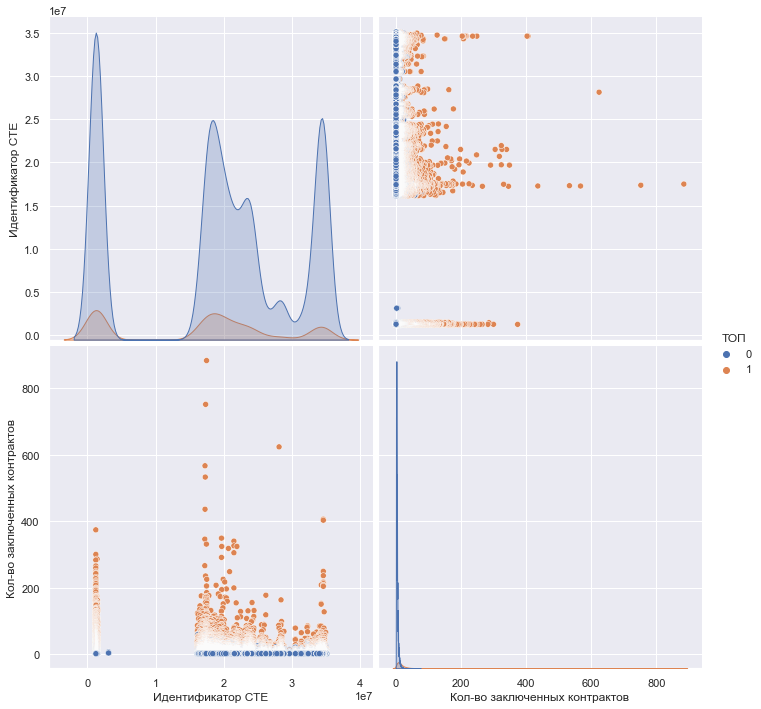

In [24]:
# Построим графики по товарам, которые в ТОПе: 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 
T = sns.pairplot(data=TOP1, hue='ТОП', height=5) 
T.savefig('ТОП.png') 

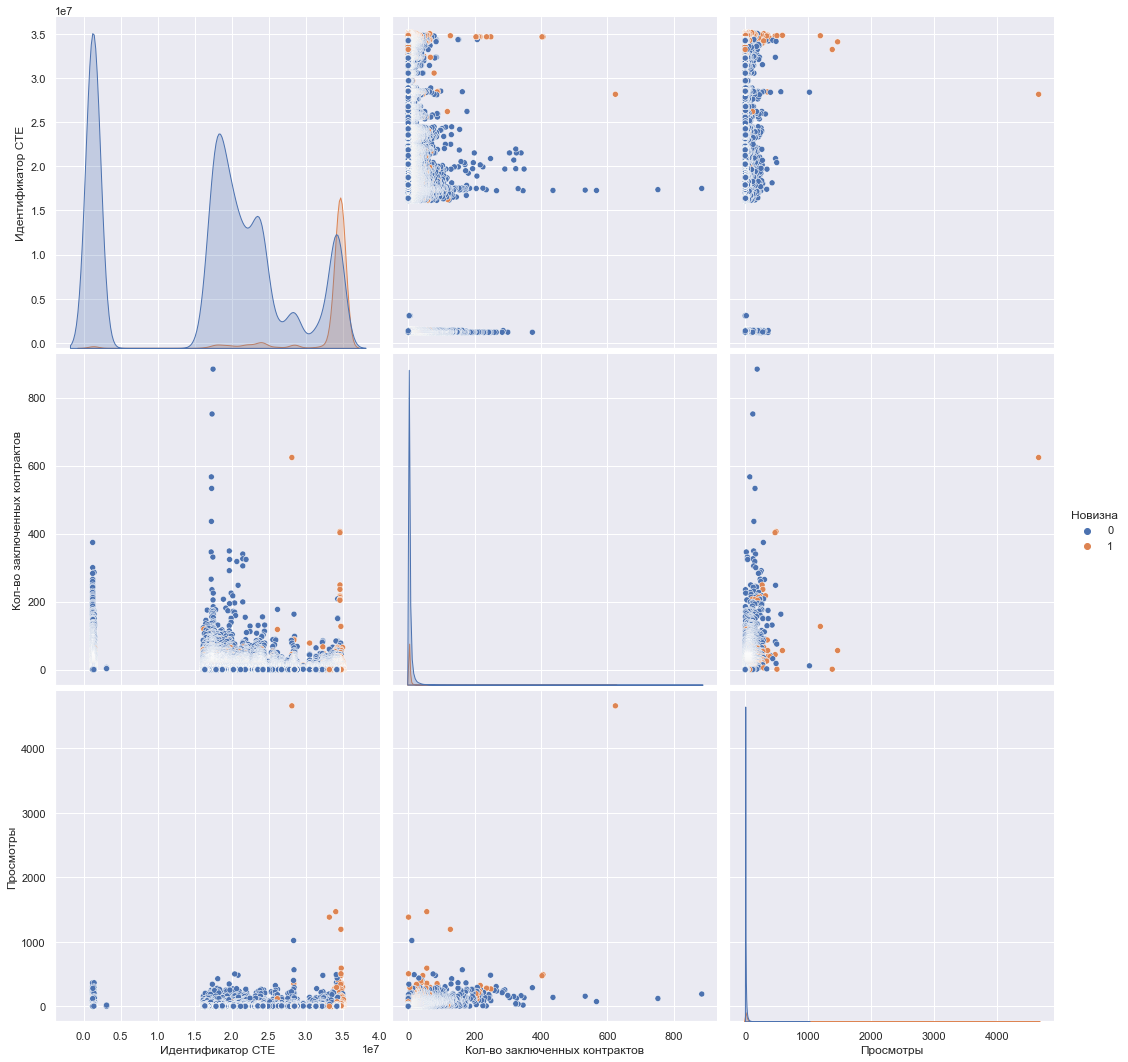

In [25]:
# Построим графики по товарам - новинкам: 
N = sns.pairplot(data=New_table, hue='Новизна', height=5) 
N.savefig('Новинки.jpg') 